In [230]:
import os 
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt
plt.rc('font', family='NanumGothic')

In [231]:
df = pd.read_excel('전체데이터(csv).xlsx')
salmon_list = ['연어']
saewoo_list = ['흰다리새우']
ojing_list = ['오징어']

In [232]:
df.head()

,REG_DATE,P_TYPE,CTRY_1,CTRY_2,P_PURPOSE,CATEGORY_1,CATEGORY_2,P_NAME,P_IMPORT_TYPE,P_PRICE
0,2015-12-28,수산물,아르헨티나,아르헨티나,판매용,갑각류,새우,아르헨티나붉은새우,냉동,7.48
1,2015-12-28,수산물,바레인,바레인,판매용,갑각류,게,꽃게,냉동,2.92
2,2015-12-28,수산물,바레인,바레인,판매용,갑각류,게,꽃게,"냉동,절단",3.36
3,2015-12-28,수산물,칠레,칠레,판매용,패류 멍게류,해삼,해삼,"건조,자숙",18.26
4,2015-12-28,수산물,중국,중국,판매용,어류,서대 박대 페루다,서대,냉동,4.79


In [233]:
df['month'] = df['REG_DATE'].apply(lambda s: str(s)[5:7])

#### 연어 - 국가에 따른 월 별 동향

In [234]:
cond = df['P_NAME'].apply(lambda s: True if s in salmon_list else False)
salmon = df.loc[cond]
salmon.head()

,REG_DATE,P_TYPE,CTRY_1,CTRY_2,P_PURPOSE,CATEGORY_1,CATEGORY_2,P_NAME,P_IMPORT_TYPE,P_PRICE,month
74,2015-12-28,수산물,노르웨이,노르웨이,판매용,어류,연어,연어,"냉장,필렛(F)",12.94,12
129,2015-12-28,수산물,노르웨이,노르웨이,판매용,어류,연어,연어,"냉장,포장횟감,필렛(F)",19.15,12
168,2015-12-28,수산물,노르웨이,노르웨이,판매용,어류,연어,연어,"냉장,필렛(F),횟감",12.08,12
174,2015-12-28,수산물,노르웨이,노르웨이,자사제품제조용,어류,연어,연어,"냉장,필렛(F)",13.43,12
198,2015-12-28,수산물,노르웨이,노르웨이,판매용,어류,연어,연어,냉장,8.84,12


In [258]:
(salmon['CTRY_1'] == salmon['CTRY_2']).sum()

1892

In [235]:
countries = list(salmon['CTRY_1'].unique())
count_country = {}
for country in countries:
    count_month = {}
    data = salmon.loc[salmon['CTRY_1']==country]
    data['cnt'] = 1
    
    monthly_count = data.groupby('month')[['cnt']].sum().reset_index()
    for i in range(monthly_count.shape[0]):
        month = monthly_count.loc[i]['month']
        cnt = monthly_count.loc[i]['cnt']
        count_month[month] = cnt
        
    count_country[country] = count_month

C:\Users\ky_moon\Anaconda3\envs\tensorflow\lib\site-packages\ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [236]:
count_country  # 이중 딕셔너리 형식으로 국가에 따른 월별 등장 빈도 계산

{'노르웨이': {'01': 129,
  '02': 128,
  '03': 130,
  '04': 132,
  '05': 138,
  '06': 129,
  '07': 138,
  '08': 136,
  '09': 125,
  '10': 139,
  '11': 131,
  '12': 141},
 '캐나다': {'01': 4,
  '02': 4,
  '03': 9,
  '04': 2,
  '05': 1,
  '06': 7,
  '07': 11,
  '08': 7,
  '09': 1,
  '10': 5,
  '11': 6,
  '12': 9},
 '영국': {'01': 6,
  '02': 6,
  '03': 8,
  '04': 15,
  '05': 15,
  '06': 17,
  '07': 21,
  '08': 15,
  '09': 17,
  '10': 12,
  '11': 11,
  '12': 4},
 '칠레': {'02': 1,
  '05': 1,
  '07': 1,
  '08': 5,
  '09': 4,
  '10': 4,
  '11': 4,
  '12': 3},
 '아일랜드': {'08': 1, '10': 1},
 '미국': {'07': 1, '08': 1, '09': 2, '10': 1, '11': 2, '12': 1},
 '러시아': {'02': 2, '03': 3, '05': 1, '10': 2, '11': 1, '12': 2},
 '아이슬란드': {'01': 2, '02': 3, '12': 2},
 '베트남': {'05': 1},
 '뉴질랜드': {'07': 1, '08': 1, '12': 1},
 '호주': {'01': 1, '09': 1, '10': 9, '11': 9, '12': 11}}

In [237]:
count_per_month = pd.DataFrame(count_country).fillna(0)
count_per_month

,노르웨이,캐나다,영국,칠레,아일랜드,미국,러시아,아이슬란드,베트남,뉴질랜드,호주
01,129,4,6,0.0,0.0,0.0,0.0,2.0,0.0,0.0,1.0
02,128,4,6,1.0,0.0,0.0,2.0,3.0,0.0,0.0,0.0
03,130,9,8,0.0,0.0,0.0,3.0,0.0,0.0,0.0,0.0
04,132,2,15,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
05,138,1,15,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0
06,129,7,17,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
07,138,11,21,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
08,136,7,15,5.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0
09,125,1,17,4.0,0.0,2.0,0.0,0.0,0.0,0.0,1.0
10,139,5,12,4.0,1.0,1.0,2.0,0.0,0.0,0.0,9.0


In [238]:
rate_per_month = pd.DataFrame(count_per_month.iloc[0] / count_per_month.sum(axis=1)[0])
for i in range(1, 12):
    data = pd.DataFrame(count_per_month.iloc[i] / count_per_month.sum(axis=1)[i])
    rate_per_month = pd.concat([rate_per_month, data], axis=1)

In [239]:
rate_per_month.T

,노르웨이,캐나다,영국,칠레,아일랜드,미국,러시아,아이슬란드,베트남,뉴질랜드,호주
01,0.908451,0.028169,0.042254,0.000000,0.000000,0.000000,0.000000,0.014085,0.000000,0.000000,0.007042
02,0.888889,0.027778,0.041667,0.006944,0.000000,0.000000,0.013889,0.020833,0.000000,0.000000,0.000000
03,0.866667,0.060000,0.053333,0.000000,0.000000,0.000000,0.020000,0.000000,0.000000,0.000000,0.000000
04,0.885906,0.013423,0.100671,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
05,0.878981,0.006369,0.095541,0.006369,0.000000,0.000000,0.006369,0.000000,0.006369,0.000000,0.000000
06,0.843137,0.045752,0.111111,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
07,0.797688,0.063584,0.121387,0.005780,0.000000,0.005780,0.000000,0.000000,0.000000,0.005780,0.000000
08,0.819277,0.042169,0.090361,0.030120,0.006024,0.006024,0.000000,0.000000,0.000000,0.006024,0.000000
09,0.833333,0.006667,0.113333,0.026667,0.000000,0.013333,0.000000,0.000000,0.000000,0.000000,0.006667
10,0.803468,0.028902,0.069364,0.023121,0.005780,0.005780,0.011561,0.000000,0.000000,0.000000,0.052023


In [240]:
rate_per_month.sum(axis=0)

01    1.0
02    1.0
03    1.0
04    1.0
05    1.0
06    1.0
07    1.0
08    1.0
09    1.0
10    1.0
11    1.0
12    1.0
dtype: float64

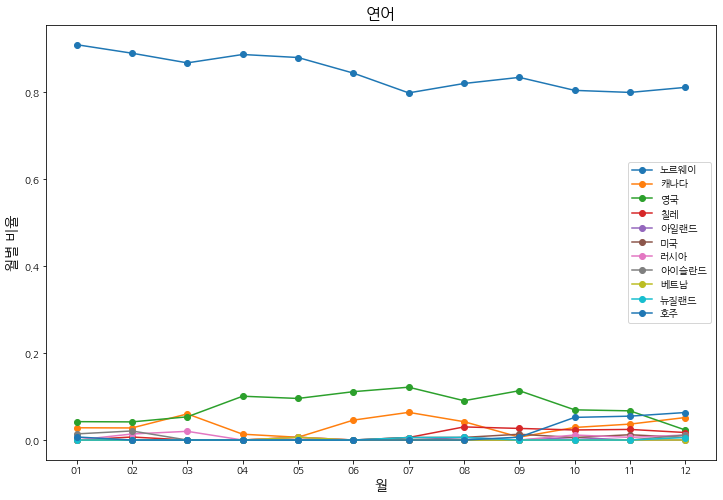

In [241]:
plt.figure(figsize=(12, 8))
for country in countries:
    plt.plot(rate_per_month.T.index, rate_per_month.T[country], marker='o')
    plt.ylabel('월별 비율', fontsize=14)
    plt.xlabel('월', fontsize=14)

plt.title('연어', fontsize=16)
plt.legend(countries, loc='best')
plt.show()

In [250]:
r = rate_per_month.T
r.iloc[:, 1:].sum(axis=1)

01    0.091549
02    0.111111
03    0.133333
04    0.114094
05    0.121019
06    0.156863
07    0.202312
08    0.180723
09    0.166667
10    0.196532
11    0.201220
12    0.189655
dtype: float64

In [251]:
r['타국'] = r.iloc[:, 1:].sum(axis=1)
r = r[['노르웨이', '타국']]

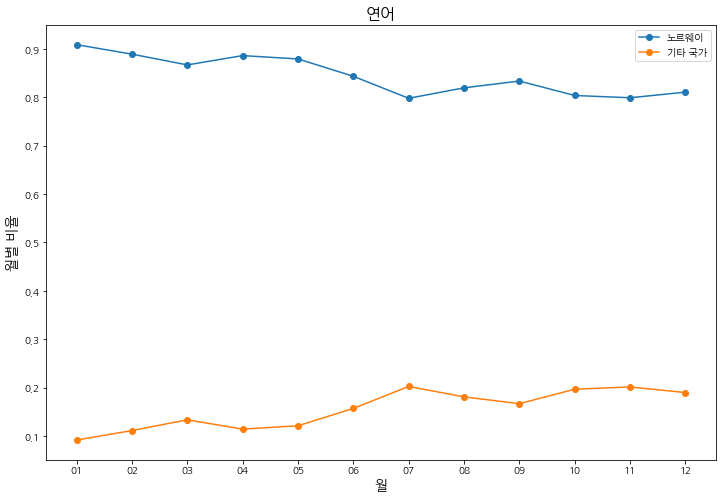

In [259]:
plt.figure(figsize=(12, 8))
for country in ['노르웨이', '타국']:
    plt.plot(r.index, r[country], marker='o')
    plt.ylabel('월별 비율', fontsize=14)
    plt.xlabel('월', fontsize=14)

plt.title('연어', fontsize=16)
plt.legend(['노르웨이', '기타 국가'], loc='best')
plt.show()

In [ ]:
plt.figure(figsize=(12, 8))

plt.plot(r.index, rate_per_month.T[country], marker='o')
plt.ylabel('월별 비율', fontsize=14)
plt.xlabel('월', fontsize=14)

plt.title('연어', fontsize=16)
plt.legend(countries, loc='best')
plt.show()

#### 새우

In [216]:
total = pd.read_excel('전체데이터(csv).xlsx')
total['month'] = total['REG_DATE'].apply(lambda s: str(s)[5:7])
saewoo_list = ['흰다리새우']

cond = total['P_NAME'].apply(lambda s: True if s in saewoo_list else False)
df = total.loc[cond]
df.head()

,REG_DATE,P_TYPE,CTRY_1,CTRY_2,P_PURPOSE,CATEGORY_1,CATEGORY_2,P_NAME,P_IMPORT_TYPE,P_PRICE,month
8,2015-12-28,수산물,중국,중국,판매용,갑각류,새우,흰다리새우,"냉동,살,자숙",7.20,12
9,2015-12-28,수산물,중국,중국,판매용,갑각류,새우,흰다리새우,"냉동,살",6.97,12
28,2015-12-28,수산물,페루,페루,판매용,갑각류,새우,흰다리새우,냉동,6.10,12
36,2015-12-28,수산물,태국,태국,판매용,갑각류,새우,흰다리새우,"냉동,살,자숙",13.38,12
37,2015-12-28,수산물,태국,태국,판매용,갑각류,새우,흰다리새우,"냉동,살",15.05,12


In [217]:
countries = list(df['CTRY_1'].unique())
count_country = {}
for country in countries:
    count_month = {}
    data = df.loc[df['CTRY_1']==country]
    data['cnt'] = 1
    
    monthly_count = data.groupby('month')[['cnt']].sum().reset_index()
    for i in range(monthly_count.shape[0]):
        month = monthly_count.loc[i]['month']
        cnt = monthly_count.loc[i]['cnt']
        count_month[month] = cnt
        
    count_country[country] = count_month

C:\Users\ky_moon\Anaconda3\envs\tensorflow\lib\site-packages\ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [218]:
count_country 

{'중국': {'01': 23,
  '02': 14,
  '03': 16,
  '04': 15,
  '05': 19,
  '06': 12,
  '07': 11,
  '08': 15,
  '09': 14,
  '10': 14,
  '11': 16,
  '12': 14},
 '페루': {'01': 3,
  '02': 6,
  '03': 8,
  '04': 9,
  '05': 7,
  '06': 8,
  '07': 12,
  '08': 7,
  '09': 8,
  '10': 6,
  '11': 2,
  '12': 8},
 '태국': {'01': 71,
  '02': 61,
  '03': 81,
  '04': 76,
  '05': 74,
  '06': 79,
  '07': 81,
  '08': 69,
  '09': 63,
  '10': 69,
  '11': 71,
  '12': 88},
 '사우디아라비아': {'01': 5,
  '02': 8,
  '03': 7,
  '04': 6,
  '05': 1,
  '06': 7,
  '07': 4,
  '08': 7,
  '09': 7,
  '10': 9,
  '11': 4,
  '12': 4},
 '에콰도르': {'01': 22,
  '02': 19,
  '03': 20,
  '04': 22,
  '05': 20,
  '06': 19,
  '07': 21,
  '08': 22,
  '09': 20,
  '10': 21,
  '11': 21,
  '12': 23},
 '말레이시아': {'01': 21,
  '02': 20,
  '03': 18,
  '04': 17,
  '05': 17,
  '06': 18,
  '07': 22,
  '08': 22,
  '09': 17,
  '10': 19,
  '11': 18,
  '12': 24},
 '베트남': {'01': 108,
  '02': 93,
  '03': 97,
  '04': 104,
  '05': 96,
  '06': 97,
  '07': 108,
  '08': 103,


In [219]:
count_per_month = pd.DataFrame(count_country).fillna(0)
count_per_month

,중국,페루,태국,사우디아라비아,에콰도르,말레이시아,베트남,인도,인도네시아,파나마,필리핀,콜롬비아
01,23,3,71,5,22,21,108,14,10,1.0,0.0,0.0
02,14,6,61,8,19,20,93,6,2,0.0,0.0,1.0
03,16,8,81,7,20,18,97,9,8,0.0,0.0,2.0
04,15,9,76,6,22,17,104,8,7,0.0,0.0,0.0
05,19,7,74,1,20,17,96,8,7,0.0,1.0,0.0
06,12,8,79,7,19,18,97,12,8,0.0,0.0,4.0
07,11,12,81,4,21,22,108,11,5,0.0,0.0,2.0
08,15,7,69,7,22,22,103,14,1,0.0,0.0,1.0
09,14,8,63,7,20,17,96,9,3,2.0,1.0,0.0
10,14,6,69,9,21,19,108,10,6,3.0,0.0,3.0


In [220]:
rate_per_month = pd.DataFrame(count_per_month.iloc[0] / count_per_month.sum(axis=1)[0])
for i in range(1, 12):
    data = pd.DataFrame(count_per_month.iloc[i] / count_per_month.sum(axis=1)[i])
    rate_per_month = pd.concat([rate_per_month, data], axis=1)

In [221]:
rate_per_month.T

,중국,페루,태국,사우디아라비아,에콰도르,말레이시아,베트남,인도,인도네시아,파나마,필리핀,콜롬비아
01,0.082734,0.010791,0.255396,0.017986,0.079137,0.075540,0.388489,0.050360,0.035971,0.003597,0.000000,0.000000
02,0.060870,0.026087,0.265217,0.034783,0.082609,0.086957,0.404348,0.026087,0.008696,0.000000,0.000000,0.004348
03,0.060150,0.030075,0.304511,0.026316,0.075188,0.067669,0.364662,0.033835,0.030075,0.000000,0.000000,0.007519
04,0.056818,0.034091,0.287879,0.022727,0.083333,0.064394,0.393939,0.030303,0.026515,0.000000,0.000000,0.000000
05,0.076000,0.028000,0.296000,0.004000,0.080000,0.068000,0.384000,0.032000,0.028000,0.000000,0.004000,0.000000
06,0.045455,0.030303,0.299242,0.026515,0.071970,0.068182,0.367424,0.045455,0.030303,0.000000,0.000000,0.015152
07,0.039711,0.043321,0.292419,0.014440,0.075812,0.079422,0.389892,0.039711,0.018051,0.000000,0.000000,0.007220
08,0.057471,0.026820,0.264368,0.026820,0.084291,0.084291,0.394636,0.053640,0.003831,0.000000,0.000000,0.003831
09,0.058333,0.033333,0.262500,0.029167,0.083333,0.070833,0.400000,0.037500,0.012500,0.008333,0.004167,0.000000
10,0.052239,0.022388,0.257463,0.033582,0.078358,0.070896,0.402985,0.037313,0.022388,0.011194,0.000000,0.011194


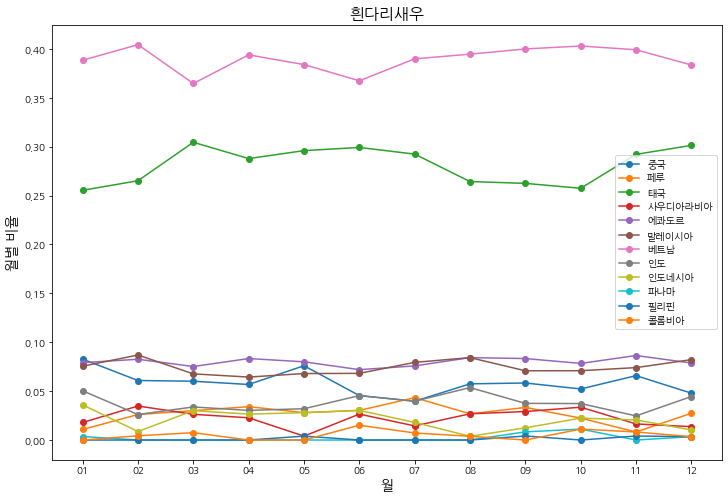

In [222]:
plt.figure(figsize=(12, 8))
for country in countries:
    plt.plot(rate_per_month.T.index, rate_per_month.T[country], marker='o')
    plt.ylabel('월별 비율', fontsize=14)
    plt.xlabel('월', fontsize=14)

plt.title('흰다리새우', fontsize=16)
plt.legend(countries, loc='best')
plt.show()

#### 오징어

In [223]:
total = pd.read_excel('전체데이터(csv).xlsx')
total['month'] = total['REG_DATE'].apply(lambda s: str(s)[5:7])
ojing_list = ['오징어']

cond = total['P_NAME'].apply(lambda s: True if s in ojing_list else False)
df = total.loc[cond]
df.head()

,REG_DATE,P_TYPE,CTRY_1,CTRY_2,P_PURPOSE,CATEGORY_1,CATEGORY_2,P_NAME,P_IMPORT_TYPE,P_PRICE,month
46,2015-12-28,수산물,대만,대만,판매용,연체류 해물모듬,오징어,오징어,"냉동,동체",1.99,12
94,2015-12-28,수산물,중국,중국,판매용,연체류 해물모듬,오징어,오징어,"냉동,동체",0.79,12
119,2015-12-28,수산물,페루,페루,판매용,연체류 해물모듬,오징어,오징어,"냉동,다리",1.23,12
143,2015-12-28,수산물,페루,페루,판매용,연체류 해물모듬,오징어,오징어,"냉동,동체,자숙",5.48,12
160,2015-12-28,수산물,칠레,칠레,판매용,연체류 해물모듬,오징어,오징어,"냉동,다리",0.97,12


In [224]:
countries = list(df['CTRY_1'].unique())
count_country = {}
for country in countries:
    count_month = {}
    data = df.loc[df['CTRY_1']==country]
    data['cnt'] = 1
    
    monthly_count = data.groupby('month')[['cnt']].sum().reset_index()
    for i in range(monthly_count.shape[0]):
        month = monthly_count.loc[i]['month']
        cnt = monthly_count.loc[i]['cnt']
        count_month[month] = cnt
        
    count_country[country] = count_month

C:\Users\ky_moon\Anaconda3\envs\tensorflow\lib\site-packages\ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [225]:
count_country 

{'대만': {'01': 9,
  '02': 3,
  '03': 1,
  '04': 2,
  '05': 3,
  '06': 9,
  '07': 9,
  '08': 6,
  '09': 4,
  '10': 4,
  '11': 7,
  '12': 14},
 '중국': {'01': 80,
  '02': 35,
  '03': 55,
  '04': 56,
  '05': 56,
  '06': 60,
  '07': 64,
  '08': 48,
  '09': 43,
  '10': 52,
  '11': 64,
  '12': 99},
 '페루': {'01': 88,
  '02': 73,
  '03': 94,
  '04': 84,
  '05': 89,
  '06': 75,
  '07': 96,
  '08': 113,
  '09': 99,
  '10': 93,
  '11': 72,
  '12': 70},
 '칠레': {'01': 45,
  '02': 30,
  '03': 49,
  '04': 52,
  '05': 52,
  '06': 66,
  '07': 80,
  '08': 70,
  '09': 65,
  '10': 61,
  '11': 44,
  '12': 41},
 '대한민국': {'01': 9,
  '02': 4,
  '03': 2,
  '04': 9,
  '05': 6,
  '06': 4,
  '07': 5,
  '08': 2,
  '09': 4,
  '10': 6,
  '11': 10,
  '12': 11},
 '아르헨티나': {'02': 2,
  '03': 3,
  '04': 9,
  '05': 14,
  '06': 12,
  '07': 15,
  '08': 9,
  '09': 8,
  '10': 6,
  '11': 10,
  '12': 3},
 '러시아': {'01': 2,
  '02': 2,
  '03': 1,
  '05': 1,
  '08': 1,
  '09': 1,
  '10': 1,
  '12': 2},
 '뉴질랜드': {'01': 2,
  '03': 2,
  

In [226]:
count_per_month = pd.DataFrame(count_country).fillna(0)
count_per_month

,대만,중국,페루,칠레,대한민국,아르헨티나,러시아,뉴질랜드,바누아투,에콰도르,미국,베트남,인도네시아,나미비아,우루과이,캐나다,스페인,필리핀
01,9,80,88,45,9,0.0,2.0,2.0,1.0,2.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
02,3,35,73,30,4,2.0,2.0,0.0,0.0,1.0,0.0,0.0,3.0,0.0,0.0,0.0,0.0,0.0
03,1,55,94,49,2,3.0,1.0,2.0,0.0,1.0,4.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
04,2,56,84,52,9,9.0,0.0,9.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
05,3,56,89,52,6,14.0,1.0,2.0,0.0,0.0,3.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
06,9,60,75,66,4,12.0,0.0,8.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
07,9,64,96,80,5,15.0,0.0,8.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0
08,6,48,113,70,2,9.0,1.0,5.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0
09,4,43,99,65,4,8.0,1.0,6.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,0.0,1.0,0.0
10,4,52,93,61,6,6.0,1.0,5.0,0.0,0.0,2.0,1.0,1.0,0.0,2.0,2.0,1.0,0.0


In [227]:
rate_per_month = pd.DataFrame(count_per_month.iloc[0] / count_per_month.sum(axis=1)[0])
for i in range(1, 12):
    data = pd.DataFrame(count_per_month.iloc[i] / count_per_month.sum(axis=1)[i])
    rate_per_month = pd.concat([rate_per_month, data], axis=1)

In [228]:
rate_per_month.T

,대만,중국,페루,칠레,대한민국,아르헨티나,러시아,뉴질랜드,바누아투,에콰도르,미국,베트남,인도네시아,나미비아,우루과이,캐나다,스페인,필리핀
01,0.037500,0.333333,0.366667,0.187500,0.037500,0.000000,0.008333,0.008333,0.004167,0.008333,0.004167,0.000000,0.004167,0.000000,0.000000,0.000000,0.000000,0.000000
02,0.019608,0.228758,0.477124,0.196078,0.026144,0.013072,0.013072,0.000000,0.000000,0.006536,0.000000,0.000000,0.019608,0.000000,0.000000,0.000000,0.000000,0.000000
03,0.004717,0.259434,0.443396,0.231132,0.009434,0.014151,0.004717,0.009434,0.000000,0.004717,0.018868,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
04,0.009009,0.252252,0.378378,0.234234,0.040541,0.040541,0.000000,0.040541,0.000000,0.000000,0.000000,0.004505,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
05,0.013158,0.245614,0.390351,0.228070,0.026316,0.061404,0.004386,0.008772,0.000000,0.000000,0.013158,0.000000,0.004386,0.000000,0.000000,0.004386,0.000000,0.000000
06,0.038462,0.256410,0.320513,0.282051,0.017094,0.051282,0.000000,0.034188,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
07,0.032258,0.229391,0.344086,0.286738,0.017921,0.053763,0.000000,0.028674,0.000000,0.000000,0.000000,0.000000,0.003584,0.003584,0.000000,0.000000,0.000000,0.000000
08,0.023256,0.186047,0.437984,0.271318,0.007752,0.034884,0.003876,0.019380,0.000000,0.000000,0.003876,0.000000,0.000000,0.000000,0.003876,0.000000,0.003876,0.003876
09,0.017167,0.184549,0.424893,0.278970,0.017167,0.034335,0.004292,0.025751,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.008584,0.000000,0.004292,0.000000
10,0.016878,0.219409,0.392405,0.257384,0.025316,0.025316,0.004219,0.021097,0.000000,0.000000,0.008439,0.004219,0.004219,0.000000,0.008439,0.008439,0.004219,0.000000


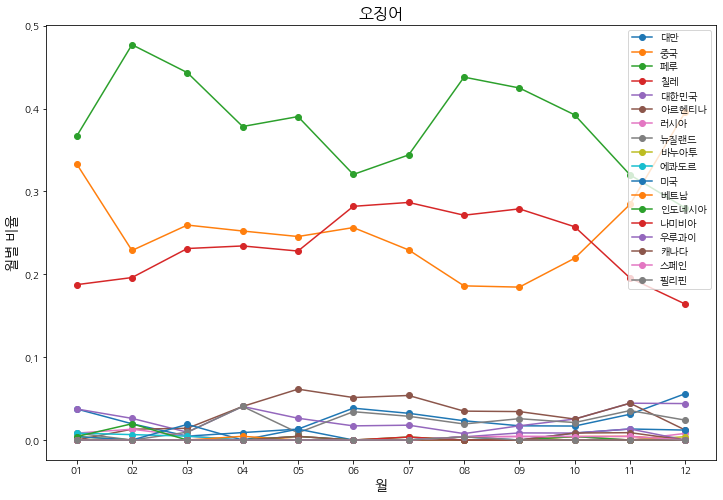

In [229]:
plt.figure(figsize=(12, 8))
for country in countries:
    plt.plot(rate_per_month.T.index, rate_per_month.T[country], marker='o')
    plt.ylabel('월별 비율', fontsize=14)
    plt.xlabel('월', fontsize=14)

plt.title('오징어', fontsize=16)
plt.legend(countries, loc='best')
plt.show()